In [12]:
###This code generates autoencoders for quantum phase transtions. Circuits were taken from arXiv:1905.10876 
###Code written by Douglas M.

from qiskit import *

In [13]:
user='douglas'

In [14]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.0',
 'qiskit-aer': '0.7.0',
 'qiskit-ignis': '0.5.0',
 'qiskit-ibmq-provider': '0.11.0',
 'qiskit-aqua': '0.8.0',
 'qiskit': '0.23.0'}

In [15]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.0',
 'qiskit-aer': '0.7.0',
 'qiskit-ignis': '0.5.0',
 'qiskit-ibmq-provider': '0.11.0',
 'qiskit-aqua': '0.8.0',
 'qiskit': '0.23.0'}

In [16]:
import numpy as np
from qiskit import circuit
from qiskit.quantum_info import Operator
if user=='douglas':
    from qiskit.circuit.library import CRXGate

# -- DL
if user=='dan':
    from qiskit.extensions.standard import CrxGate as CRXGate
pi = np.pi
%matplotlib inline

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
L=4 ##Lattice size. Must be even
layers=2

In [25]:
##This block generates circuit 11

# -- DL
def get_circuit_11(L):
    a=2*pi*np.random.random(layers*(4*L-4))
    q=QuantumRegister(L)
    circ=QuantumCircuit(q)
    for layer in range(layers):
        for i in range(len(q)):
            ##adds first layer of rotations
            circ.ry(a[layer*(4*L-4)+i],q[i])
            circ.rz(a[layer*(4*L-4)+i+L],q[i])
        #adds first layer of CNOTs
        for j in range(0,len(q),2):
            circ.cx(q[j+1],q[j])
        ##add second layer of rotations
        for k in range(0,len(q)-2):
            circ.ry(a[layer*(4*L-4)+2*L+k],q[k+1])
            circ.rz(a[layer*(4*L-4)+2*L+L-2+k],q[k+1])
            print(layer*(4*L-4)+2*L+k)
        ##add second layer of CNOTs
        for l in range(1,len(q)-1,2):
            circ.cx(q[l+1],q[l])

    return circ

circ = get_circuit_11(L)
circ.draw()

8
9
20
21


┌────────────┐ ┌────────────┐┌───┐ ┌────────────┐┌─────────────┐     »
q8_0: ┤ RY(3.4985) ├─┤ RZ(2.3914) ├┤ X ├─┤ RY(5.5074) ├┤ RZ(0.61051) ├─────»
      ├────────────┤┌┴────────────┤└─┬─┘ ├────────────┤├─────────────┤┌───┐»
q8_1: ┤ RY(6.2535) ├┤ RZ(0.38993) ├──■───┤ RY(5.8437) ├┤ RZ(0.45465) ├┤ X ├»
      ├───────────┬┘└┬───────────┬┘┌───┐ ├────────────┤└┬────────────┤└─┬─┘»
q8_2: ┤ RY(1.596) ├──┤ RZ(4.659) ├─┤ X ├─┤ RY(5.6231) ├─┤ RZ(6.2363) ├──■──»
      ├───────────┴┐ ├───────────┴┐└─┬─┘┌┴────────────┤ ├───────────┬┘     »
q8_3: ┤ RY(1.7723) ├─┤ RZ(2.3927) ├──■──┤ RY(0.12379) ├─┤ RZ(4.664) ├──────»
      └────────────┘ └────────────┘     └─────────────┘ └───────────┘      »
«                                  ┌───┐                                  
«q8_0: ────────────────────────────┤ X ├──────────────────────────────────
«      ┌────────────┐┌────────────┐└─┬─┘┌─────────────┐┌────────────┐┌───┐
«q8_1: ┤ RY(2.4762) ├┤ RZ(3.6685) ├──■──┤ RY(0.89854) ├┤ RZ(5.0174) ├┤ X ├
«      ├────────────┤├────────────┤┌───┐└┬────────────┤└┬──────────┬┘└─┬─┘
«q8_2: ┤ RY(2.9673) ├┤ RZ(3.9058) ├┤ X ├─┤ RY(4.2515) ├─┤ RZ(6.06) ├───■──
«      └────────────┘└────────────┘└─┬─┘ └────────────┘ └──────────┘      
«q8_3: ──────────────────────────────■────────────────────────────────────
«

In [26]:
##This block generates circuit 12

# -- DL
def get_circuit_12(L):
    a=2*pi*np.random.random(layers*(4*L-4))
    q=QuantumRegister(L)
    circ=QuantumCircuit(q)
    for layer in range(layers):
        ##adds first layer of rotations
        for i in range(len(q)):
            circ.ry(a[layer*(4*L-4)+i],q[i])
            circ.rz(a[layer*(4*L-4)+i+L],q[i])
        #adds first layer of C-Zs
        for j in range(0,len(q),2):
            circ.cz(q[j+1],q[j])
        ##add second layer of rotations
        for k in range(0,len(q)-2):
            circ.ry(a[layer*(4*L-4)+2*L+k],q[k+1])
            circ.rz(a[layer*(4*L-4)+2*L+L-2+k],q[k+1])
        ##add second layer of C-Zs
        for l in range(1,len(q)-1,2):
            circ.cz(q[l+1],q[l])
    return circ

circ = get_circuit_12(L)
circ.draw()

┌────────────┐┌────────────┐   ┌────────────┐┌─────────────┐   »
q9_0: ┤ RY(1.6277) ├┤ RZ(2.7122) ├─■─┤ RY(5.0214) ├┤ RZ(0.62387) ├───»
      ├────────────┤├────────────┤ │ ├────────────┤└┬───────────┬┘   »
q9_1: ┤ RY(4.0746) ├┤ RZ(1.5577) ├─■─┤ RY(4.8648) ├─┤ RZ(1.436) ├──■─»
      ├────────────┤├────────────┤   ├────────────┤┌┴───────────┴┐ │ »
q9_2: ┤ RY(2.2127) ├┤ RZ(5.0285) ├─■─┤ RY(1.8149) ├┤ RZ(0.61414) ├─■─»
      ├────────────┤├────────────┤ │ ├────────────┤└┬────────────┤   »
q9_3: ┤ RY(5.4593) ├┤ RZ(1.2743) ├─■─┤ RY(5.8782) ├─┤ RZ(2.9796) ├───»
      └────────────┘└────────────┘   └────────────┘ └────────────┘   »
«                                                                    
«q9_0: ─────────────────────────────■────────────────────────────────
«      ┌────────────┐┌────────────┐ │ ┌────────────┐┌────────────┐   
«q9_1: ┤ RY(1.2256) ├┤ RZ(1.6725) ├─■─┤ RY(6.1945) ├┤ RZ(2.6201) ├─■─
«      ├────────────┤├────────────┤   ├────────────┤├────────────┤ │ 
«q9_2: ┤ RY(3.3038) ├┤ RZ(2.3824) ├─■─┤ RY(2.0581) ├┤ RZ(3.5949) ├─■─
«      └────────────┘└────────────┘ │ └────────────┘└────────────┘   
«q9_3: ─────────────────────────────■────────────────────────────────
«

In [31]:
##This block generates circuit 19

# -- DL
def get_circuit_19(L):
    a=2*pi*np.random.random(3*L)
    q=QuantumRegister(L)
    circ=QuantumCircuit(q)
    for layer in range(layers):
    ##adds first layer of rotations
        for i in range(len(q)):
            circ.rx(a[layer*(3*L)+i],q[i])
            circ.rz(a[layer*(3*L)+i+L],q[i])
        #adds layer of C-Rx
        # crx=CRXGate(np.pi, label=None, ctrl_state=None)
        # -- DL
        crx=CRXGate(np.pi)

        for j in reversed(range(len(q))):
            circ.crx(a[layer*(3*L)+2*L+j],q[j],q[(j+1)%len(q)])
    return circ

circ = get_circuit_19(L)
circ.draw()

IndexError: index 12 is out of bounds for axis 0 with size 12

In [35]:
import qtensor as qt
import qtree
from cartesian_explorer import Explorer

ex = Explorer()

In [72]:
@ex.provider(cache=True)
def qiskit_circ_tw(circ_qasm, ordering_algo='greedy'):
    """
    Returns treewidth of a line graph obtained from 
    qiskit qasm circuit
    
    Args:
        qs_circ_qasm (str): qasm file
    """
    if ordering_algo=='greedy':
        opt = qt.optimisation.Optimizer.OrderingOptimizer()
    elif 'rgreedy' in ordering_algo:
        opt = qt.optimisation.RGreedy(temp=0.02, repeats=10)
    else:
        raise ValueError('Ordering algorithm not supported')
        
    qiskit_circuit = qiskit.QuantumCircuit.from_qasm_str(circ_qasm)
    tn = qt.optimisation.TensorNet.QtreeTensorNet.from_qiskit_circuit(qiskit_circuit)
    opt.optimize(tn)
    return opt.treewidth
    
    
@ex.provider
def circ_qasm(L, circ_type):
    """ Generate autoencoder circuit of a particular type.
    
    I have no idea what a type is -- DL
    
    Args:
        L: size of the circuit
        circ_type (str): type of the circuict
        
    Returns:
        str: qasm of qiskit circuit
    """
    circuit = {
        '19':get_circuit_19,
        '11':get_circuit_11,
        '12':get_circuit_12
           }[circ_type](L)
    return circuit.qasm()

In [73]:
qiskit_circ_tw(circ.qasm())

2

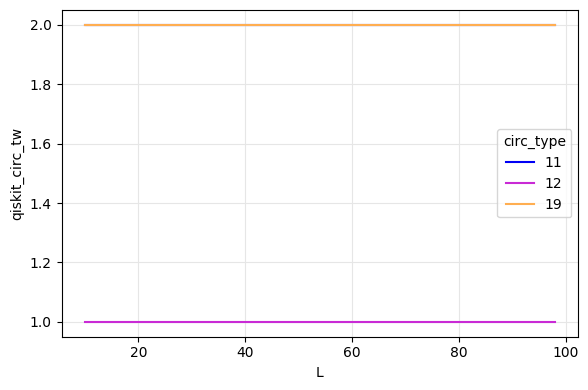

In [74]:
fig = ex.plot_variables('qiskit_circ_tw', circ_type=['11', '12', '19'], L=range(10, 100, 2))